<a href="https://colab.research.google.com/github/svkarthik86/Project--Work-demo/blob/main/Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Classification Problem
Target Value=dependent variable=y  =  categorical data 

Example:
1. mail is spam /not a sapam
2.cancer prediction s-1,s-2,s-3
3.image dog /cat?


In [ ]:
# Regression Problem
Target Value=dependent variable=y  =  numerical data /continous data

Example:
predict Price of House
Predict employee Salary
predict rainfall rate

# Decision Tree Algorithm
1.Decision Tree Classification
2.Decision Tree Regression


# 2. Decision Tree Regression


In [ ]:
import pandas as pd
income = pd.read_csv('https://raw.githubusercontent.com/svkarthik86/Meachine_Learning/main/Decision%20Tree%20Algorithm/income.csv')
income.head()



,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [ ]:
pd.get_dummies(income.Education)

,Bachelors,Diploma,Doctorate,Masters,Professional
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,0,1,0,0,0


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

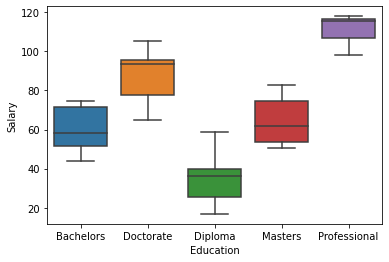

In [ ]:
ax = sns.boxplot(data = income, x = 'Education', y = 'Salary')

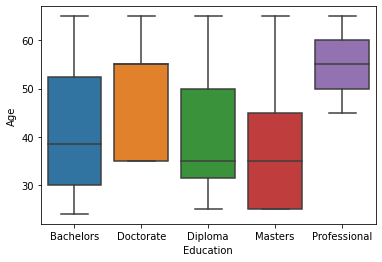

In [ ]:
ax=sns.boxplot(data = income, x = 'Education', y = 'Age')

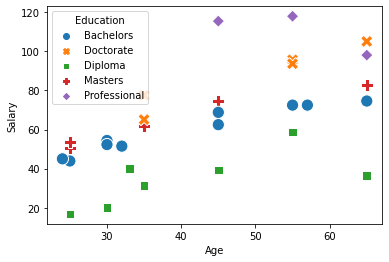

In [ ]:
ax = sns.scatterplot(data = income, 
                     x = 'Age', 
                     y = 'Salary', 
                     hue = 'Education', 
                     style = 'Education', 
                     s = 150)

In [ ]:
income.corr()

,Age,Salary
Age,1.000000,0.614553
Salary,0.614553,1.000000


In [ ]:
#3. Prepare the Data

X = income[['Age', 'Education']]
y = income[['Salary']]

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = X['Education'],
                                                    random_state = 1234)



In [ ]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
12,55,0,1,0,0,0
17,65,0,0,0,1,0
29,65,0,0,0,0,1
2,45,1,0,0,0,0
0,25,1,0,0,0,0


In [ ]:
income.Education.values

array(['Bachelors', 'Bachelors', 'Bachelors', 'Bachelors', 'Bachelors',
       'Doctorate', 'Doctorate', 'Doctorate', 'Diploma', 'Diploma',
       'Diploma', 'Diploma', 'Diploma', 'Diploma', 'Masters', 'Masters',
       'Masters', 'Masters', 'Professional', 'Professional', 'Bachelors',
       'Masters', 'Bachelors', 'Bachelors', 'Diploma', 'Doctorate',
       'Bachelors', 'Bachelors', 'Doctorate', 'Professional'],
      dtype=object)

In [ ]:
income.iloc[29,:]

Age                    65
Education    Professional
Salary               98.1
Name: 29, dtype: object

In [ ]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
22,30,1,0,0,0,0
20,24,1,0,0,0,0
7,65,0,0,1,0,0
19,55,0,0,0,0,1
3,55,1,0,0,0,0


In [ ]:
#4. Train and Evaluate the Regression Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1234)

In [ ]:
model = regressor.fit(X_train, y_train)
model.score(X_test, y_test)

0.8810756408900728

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
X_test

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
22,30,1,0,0,0,0
20,24,1,0,0,0,0
7,65,0,0,1,0,0
19,55,0,0,0,0,1
3,55,1,0,0,0,0
9,30,0,1,0,0,0
10,35,0,1,0,0,0
14,25,0,0,0,1,0


In [ ]:
model.predict([[40,0,0,0,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([61.7])

In [ ]:
import pickle

In [ ]:
file=open(b"model.obj",'wb')
pickle.dump(model,file)

In [ ]:
file1=open("model.obj",'rb')
obj_file=pickle.load(file1)
obj_file

DecisionTreeRegressor(random_state=1234)

In [ ]:
obj_file.predict([[35,0,0,1,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([71.3])

In [ ]:
file = open("Fruits.obj",'r')
object_file = pickle.load(file)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

8.15

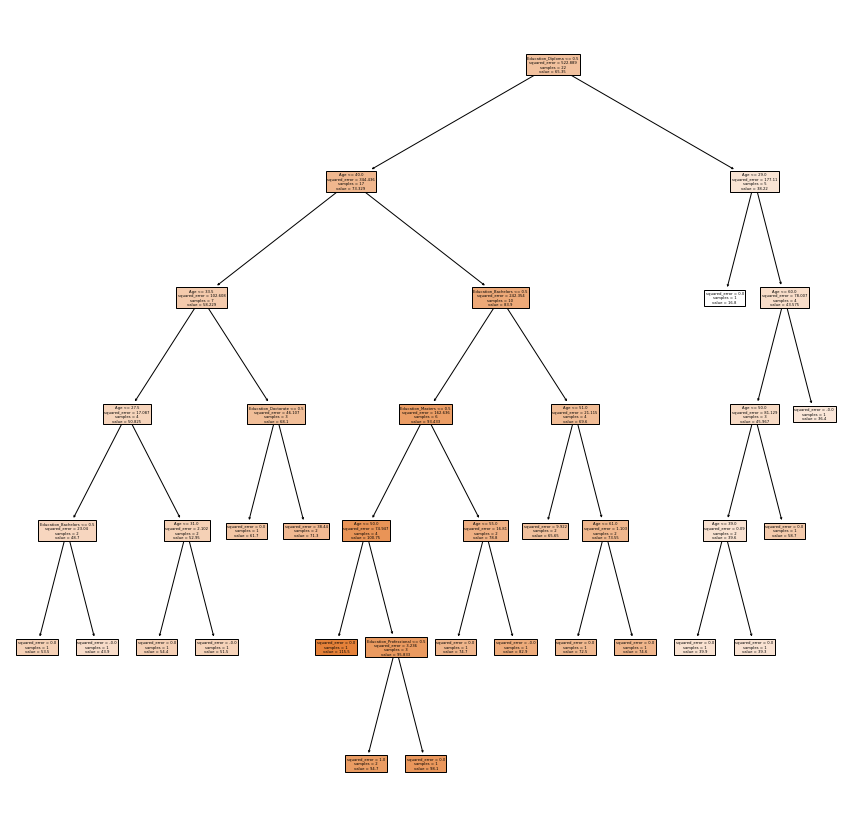

In [ ]:
#5. Visualize the Regression Tree
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
                   feature_names = list(X_train.columns), 
                   filled = True);

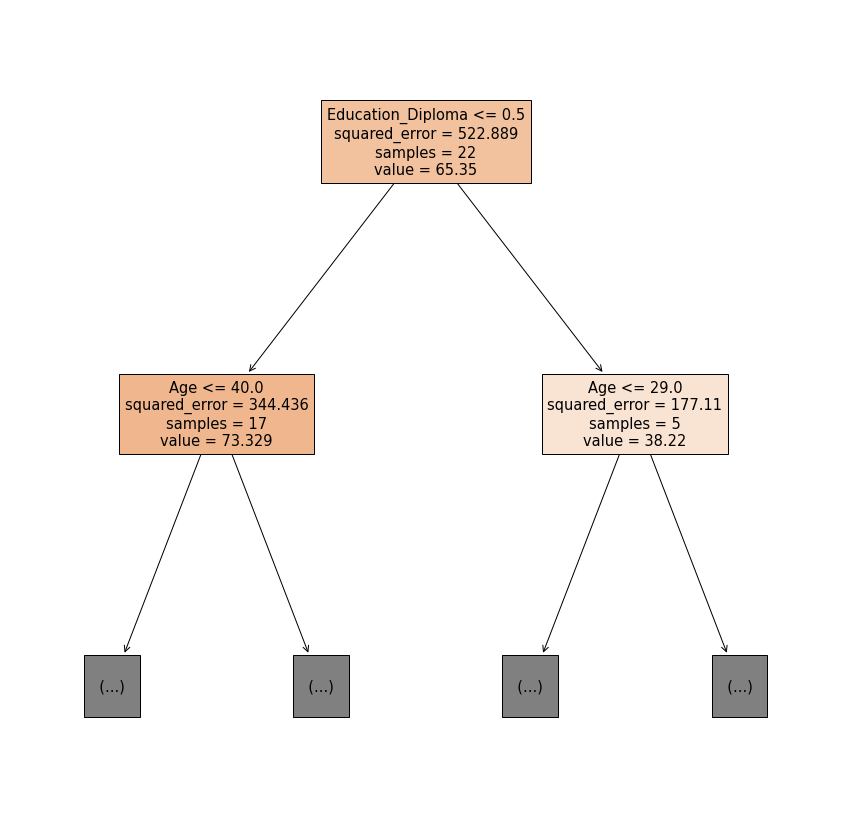

In [ ]:
plt.figure(figsize = (15,15))
tree.plot_tree(model, 
               feature_names = list(X_train.columns), 
               filled = True,
               max_depth = 1);